In [1]:
# encoding=utf-8
import numpy as np
from sklearn import svm
from sklearn import metrics
from scipy import sparse
import pandas as pd
from pandas import Series, DataFrame
from sklearn import neighbors
from sklearn import tree  
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from Tca import TCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
label_a = pd.read_csv("./data/label_all.csv")
label_a1 = label_a['SY']
label_a2 = label_a['TY']
S_Y_A = label_a1.values
T_Y_A = label_a2.values
label = pd.read_csv("./data/label_select.csv")
label1 = label['SY']
label2 = label['TY']
S_Y = label1.values
T_Y = label2.values
features_a = pd.read_csv("./data/feature_all.csv")
features_a = features_a.values
S_X_A = features_a[:,0:4]
T_X_A = features_a[:,4:8]
features = pd.read_csv("./data/feature_select.csv")
features = features.values
S_X = features[:,0:4]
T_X = features[:,4:8]
ss_X = StandardScaler()
S_X = ss_X.fit_transform(S_X)
T_X = ss_X.transform(T_X)
T_X_A = ss_X.transform(T_X_A)
S_X_A = ss_X.transform(S_X_A)

In [3]:
S=np.concatenate((S_X,S_Y.reshape(-1,1)),axis=1)#样本和标签拼接
T=np.concatenate((T_X,T_Y.reshape(-1,1)),axis=1)
S_T=np.hstack((S,T))
tca=TCA()
S_X_tca, T_X_tca, T_X_O_tca=tca.fit_transform(S_X, T_X, T_X_A)
accuracy1 = []
kappa1=[]
con_mat1=[]
param1=[]

In [4]:
from sklearn.svm import SVC
def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma)
    SVC3 = SVC3.fit(X_train, y_train)
    y_pred1 = SVC3.predict(X_val)
    accuracy=metrics.accuracy_score(y_val, y_pred1)
    kappa=metrics.cohen_kappa_score(y_val, y_pred1)
    con_mat= metrics.confusion_matrix(y_val,y_pred1)
    return accuracy, kappa, con_mat
C_s = np.logspace(-2, 2, 5)
gamma_s = np.logspace(-2, 2, 5) 

accuracy [0.80016722] 
 kappa   [0.72816495] 
 conf_mat 
 [[1121    0    0  265   33    6   31]
 [   0   48    0   17    0    0    0]
 [   1    0   50   36    0    0    1]
 [ 235    0    1 1879   78   74  366]
 [   6    0    0   68  470  112  163]
 [  19    0    0    6  153 4142  123]
 [  10    0    0    9  195  143  903]]


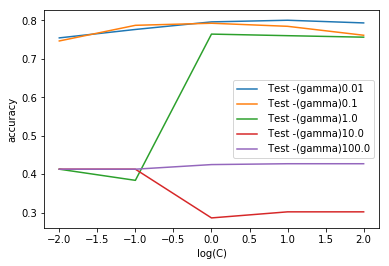

In [5]:
 
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp_acc,tmp_kappa,tmp_cm = fit_grid_point_RBF(oneC, gamma, S_X_tca.real,S_Y, T_X_O_tca.real, T_Y_A)
        accuracy1.append(tmp_acc)
        kappa1.append(tmp_kappa)
        con_mat1.append(tmp_cm)
        
        param1.append([oneC,gamma])
accuracy1 =np.array(accuracy1).reshape(len(C_s),len(gamma_s))
row1,column1=np.where(accuracy1==accuracy1.max())
kappa1 =np.array(kappa1).reshape(len(C_s),len(gamma_s))
con_mat1=np.array(con_mat1).reshape(len(C_s),len(gamma_s),7,7)
print('accuracy',
      accuracy1[row1,column1],'\n kappa  ',
      kappa1[row1,column1],'\n conf_mat \n',
      con_mat1[row1[0],column1[0]].reshape(7,7))
x_axis = np.log10(C_s)
for j, gamma in enumerate(gamma_s):
    plt.plot(x_axis, np.array(accuracy1[:,j]), label = ' Test -(gamma)' + str(gamma))
plt.legend()
plt.xlabel( 'log(C)' )                                                                                                      
plt.ylabel( 'accuracy' )
plt.savefig('./pic/svm-tca-o.png' )
plt.show()
print()